In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_predict

In [2]:
pip install --upgrade ta

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29088 sha256=3aa28b18d93be7a50a14ebff88788cbe3dc3aac1e6f0b3df2352c53e3a87959b
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\6a\76\03\7f785aaa50b9c6ec7e3fd105a62c1b2c45a034512d51e024a9
Successfully built ta
Note: you may need to restart the kernel to use updated packages.


In [13]:
import ta as ta
from ta import add_all_ta_features
from ta.utils import dropna

In [29]:
data1 = pd.read_csv(r'C:\Users\hp\Documents\Mean Reversion\NIFTY 50_Data.csv', index_col='Date', parse_dates=True)

In [30]:
data1.head()

,Close
Date,
2023-05-04,18255.80
2023-05-03,18089.85
2023-05-02,18147.65
2023-04-28,18065.00
2023-04-27,17915.05


In [31]:
data1.tail()

,Close
Date,
2013-05-10,6094.7
2013-05-09,6050.1
2013-05-08,6069.3
2013-05-07,6043.5
2013-05-06,5971.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2474 entries, 2023-05-04 to 2013-05-06
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2474 non-null   float64
dtypes: float64(1)
memory usage: 38.7 KB


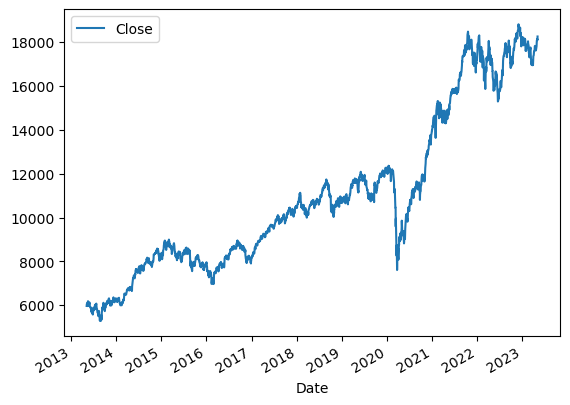

In [8]:
fig, ax = plt.subplots()
data.plot(ax=ax)
plt.show()

In [10]:
data.sort_values(by=['Date'])

,Close
Date,
2013-05-06,5971.00
2013-05-07,6043.50
2013-05-08,6069.30
2013-05-09,6050.10
2013-05-10,6094.70
...,...
2023-04-27,17915.05
2023-04-28,18065.00
2023-05-02,18147.65


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2474 entries, 2023-05-04 to 2013-05-06
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2474 non-null   float64
dtypes: float64(1)
memory usage: 38.7 KB


In [32]:
somedata1 = ta.momentum.RSIIndicator(data1['Close'])

In [15]:
somedata

In [16]:
somedata[0]

TypeError: 'RSIIndicator' object is not subscriptable

In [17]:
print(somedata)

In [18]:
type(somedata)

ta.momentum.RSIIndicator

In [20]:
ta.rsi(data['Close'])

AttributeError: module 'ta' has no attribute 'rsi'

In [33]:
somedata.rsi()

Date
2023-05-04          NaN
2023-05-03          NaN
2023-05-02          NaN
2023-04-28          NaN
2023-04-27          NaN
                ...    
2013-05-10    56.109371
2013-05-09    52.662421
2013-05-08    53.973294
2013-05-07    51.893729
2013-05-06    46.474794
Name: rsi, Length: 2474, dtype: float64

In [27]:
somedata.rsi().head(20)

Date
2023-05-04          NaN
2023-05-03          NaN
2023-05-02          NaN
2023-04-28          NaN
2023-04-27          NaN
2023-04-26          NaN
2023-04-25          NaN
2023-04-24          NaN
2023-04-21          NaN
2023-04-20          NaN
2023-04-19          NaN
2023-04-18          NaN
2023-04-17          NaN
2023-04-13    37.893341
2023-04-12    36.855580
2023-04-11    31.491317
2023-04-10    26.894451
2023-04-06    25.864020
2023-04-05    24.177343
2023-04-03    19.108931
Name: rsi, dtype: float64

In [34]:
somedata.index

AttributeError: 'RSIIndicator' object has no attribute 'index'

In [35]:
somedata.rsi().index

DatetimeIndex(['2023-05-04', '2023-05-03', '2023-05-02', '2023-04-28',
               '2023-04-27', '2023-04-26', '2023-04-25', '2023-04-24',
               '2023-04-21', '2023-04-20',
               ...
               '2013-05-16', '2013-05-15', '2013-05-14', '2013-05-13',
               '2013-05-11', '2013-05-10', '2013-05-09', '2013-05-08',
               '2013-05-07', '2013-05-06'],
              dtype='datetime64[ns]', name='Date', length=2474, freq=None)